## <font color='Brown' align='center'> Assignment – Model Selection</font>
Submitted By:-
### Athira Prakash 
#### DSA March 2023 B1




Do the following on titanic dataset 
1. Load the dataset into python environment 
2. Do all the necessary pre-processing steps 
3. Create kNN and SVM models 
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the 
average accuracy score of the models

### Load the dataset into python environment|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
titanic_data=pd.read_csv(r"D:\DSA\data\titanic_dataset .csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

### Removing unnecessory columns

In [4]:
titanic_data['PassengerId'].nunique()

891

In [5]:
titanic_data.drop('PassengerId',axis=1,inplace=True)

In [6]:
titanic_data['Name'].nunique()

891

In [7]:
titanic_data.drop('Name',axis=1,inplace=True)

In [8]:
titanic_data.drop('Ticket',axis=1,inplace=True)

### Missing Value Handle

In [9]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
print('There are', np.round(titanic_data['Cabin'].isna().mean()*100,2), '% missing values in the column Cabin')

There are 77.1 % missing values in the column Cabin


In [11]:
titanic_data.drop('Cabin',axis=1,inplace=True)

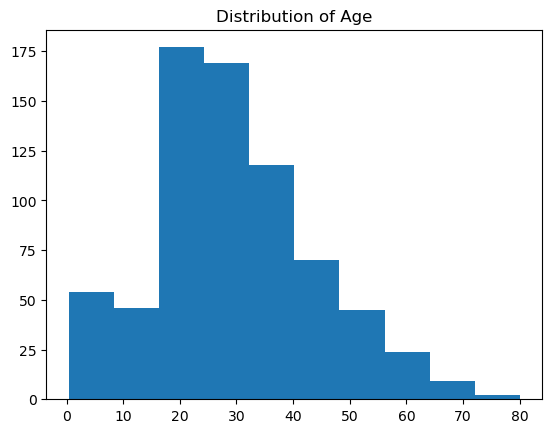

In [12]:
plt.hist(titanic_data['Age'])
plt.title('Distribution of Age')
plt.show()

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [14]:
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

In [16]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Outlier Handling

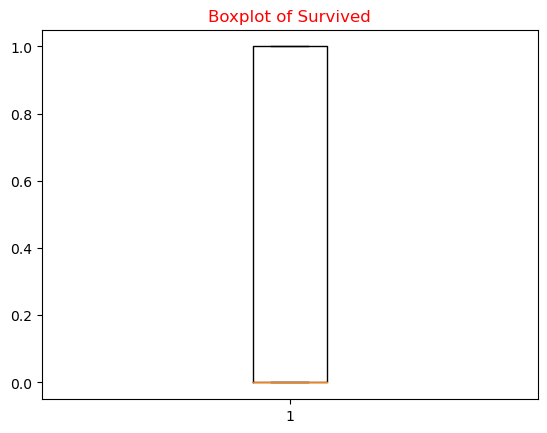

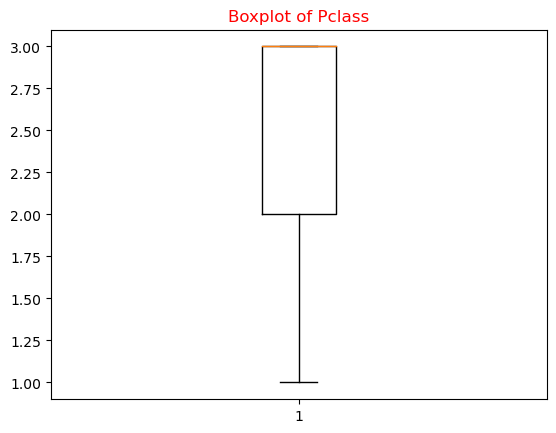

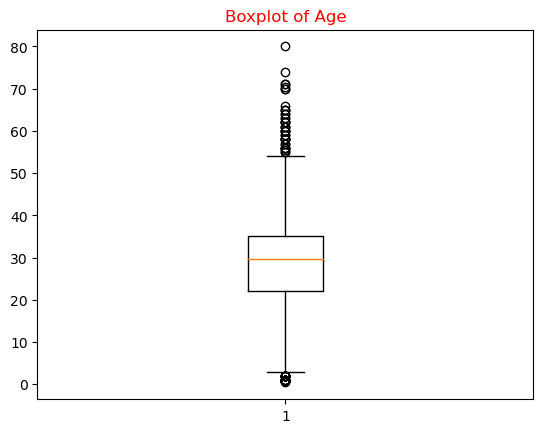

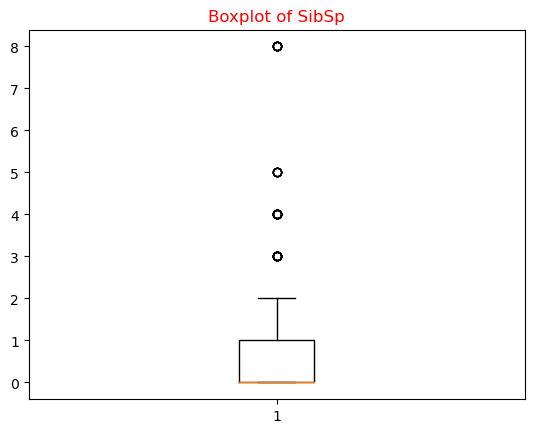

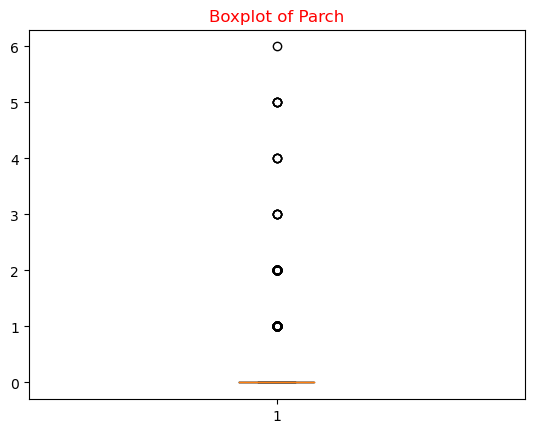

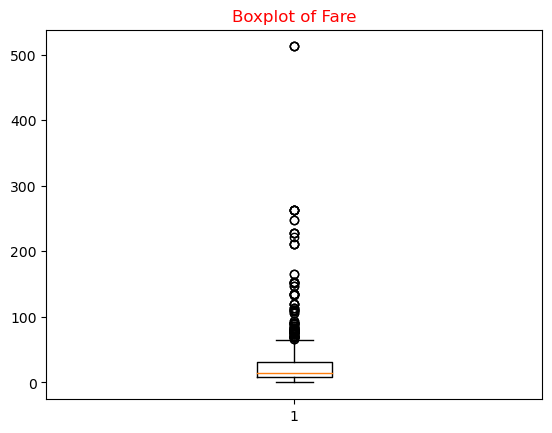

In [17]:
num_col = titanic_data.select_dtypes(include=['float', 'int'])
for col in num_col:
    plt.figure()
    plt.boxplot(titanic_data[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

In [18]:
Q1 = titanic_data['SibSp'].quantile(0.25)
Q3 = titanic_data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
upp = Q3 + (1.5 * IQR)
out_ind = titanic_data[(titanic_data['SibSp'] > upp) | (titanic_data['Fare'] < low)].index
titanic_data.drop(out_ind, inplace = True)

In [19]:
for col in ['Age', 'Fare','Parch']:
    Q1 = titanic_data[col].quantile(0.25)
    Q3 =titanic_data[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    upp = Q3 + (1.5 * IQR)
    titanic_data[col] = np.where(titanic_data[col] > upp, upp, np.where(titanic_data[col] < low, low, titanic_data[col]))

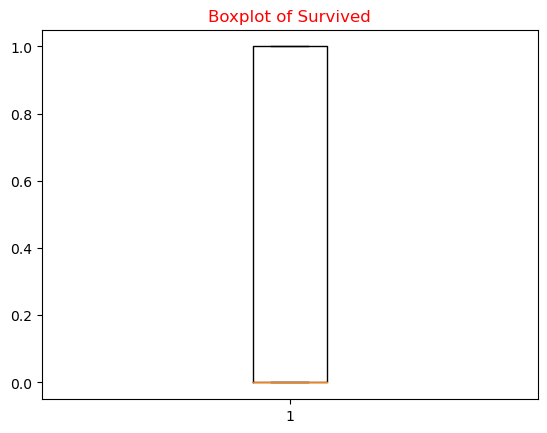

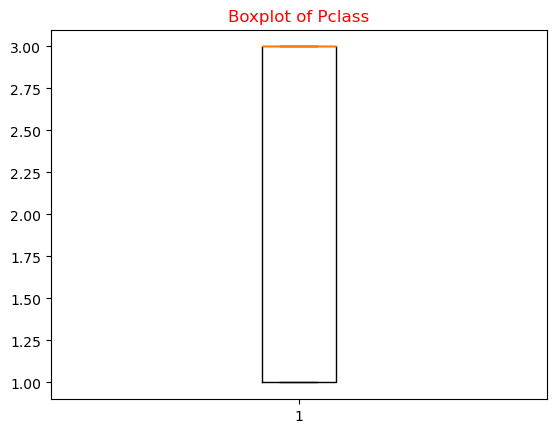

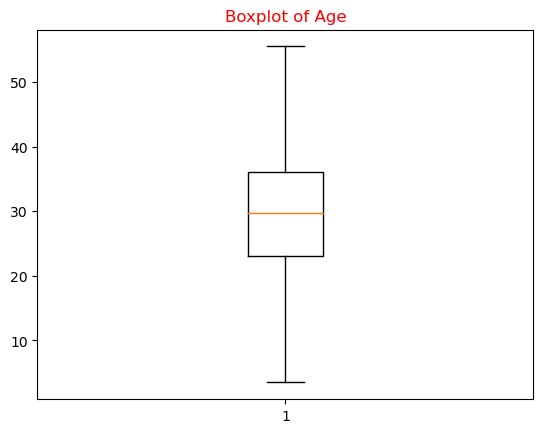

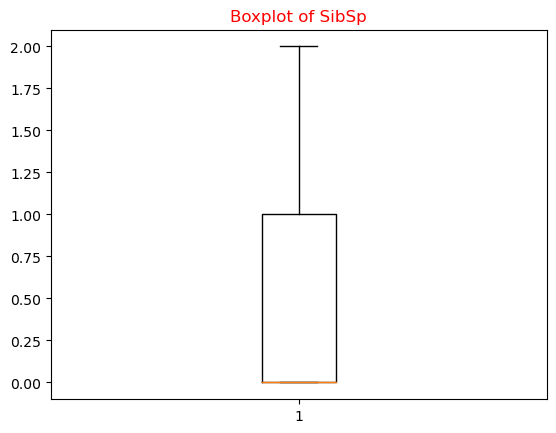

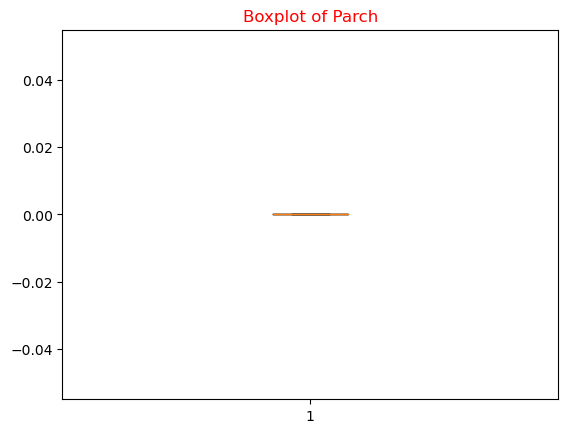

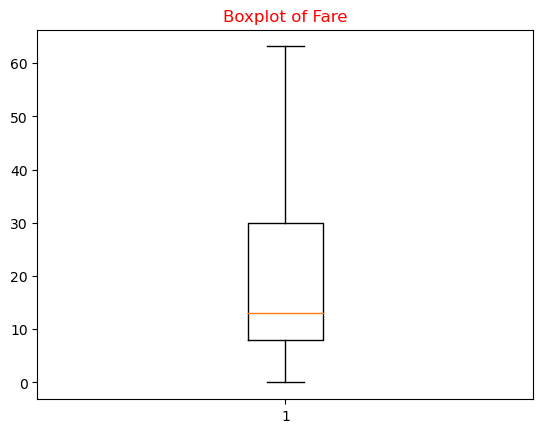

In [20]:
num_col = titanic_data.select_dtypes(include=['float', 'int'])
for col in num_col:
    plt.figure()
    plt.boxplot(titanic_data[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

In [21]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch       float64
Fare        float64
Embarked     object
dtype: object

### Encoding

In [22]:
titanic_data.Sex.nunique()

2

In [23]:
titanic_data.Embarked.nunique()

3

In [24]:
titanic_data1 = pd.get_dummies(titanic_data)

In [25]:
titanic_data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0.0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0.0,63.1563,1,0,1,0,0
2,1,3,26.0,0,0.0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0.0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0.0,8.0500,0,1,0,0,1


In [26]:
x = titanic_data1.drop('Survived', axis = 1)  # DataFrame with feature columns
y = titanic_data1['Survived']                 # Target column

### Scailing

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
min_max = MinMaxScaler()

In [29]:
x = min_max.fit_transform(x)

In [30]:
titanic_data1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [31]:
x = pd.DataFrame(x, columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

##  SVM Model 

###  1. Hold Out

In [33]:
from sklearn.svm import SVC
svmclf =SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
y_pred_svm=svmclf.predict(x_test)

In [35]:
score_svm = svmclf.score(x_test,y_test)

In [36]:
score_svm

0.8537735849056604

###  2. KFold 

In [37]:
from sklearn.model_selection import KFold

In [38]:
kfold_validator = KFold(5)

In [39]:
for train_index,test_index in kfold_validator.split(x,y):
    print('training Index:',train_index)
    print('Testing Index',test_index)

training Index: [169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 41

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cv_result = cross_val_score(svmclf,x,y,cv=kfold_validator)

In [42]:
cv_result

array([0.81656805, 0.79881657, 0.79881657, 0.74556213, 0.81065089])

In [43]:
np.mean(cv_result)

0.7940828402366863

###  3. Stratified KFold

In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
skfold_validator = StratifiedKFold(n_splits=5)

In [46]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [158 159 160 161 162 163 164 167 170 171 173 178 179 181 182 183 184 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 4

In [47]:
skcv_result =cross_val_score(svmclf,x,y,cv=skfold_validator)

In [48]:
skcv_result 

array([0.80473373, 0.81065089, 0.79881657, 0.76331361, 0.79289941])

In [49]:
np.mean(skcv_result)

0.7940828402366864

### KNN

### 1. Hold Out

In [50]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

k_val = np.arange(3,25)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train, y_train)
    pred  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

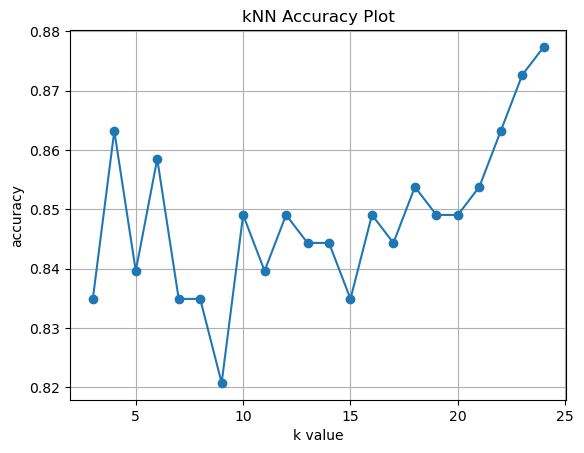

In [51]:
plt.plot(k_val,acc_val,'o-')
plt.title('kNN Accuracy Plot')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [52]:
classifier = KNeighborsClassifier(n_neighbors =24 , metric = 'minkowski')
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [53]:
y_pred_knn  = classifier.predict(x_test)

In [54]:
score_knn=round(accuracy_score(y_test,y_pred_knn),2)

In [55]:
print('accuracy is: ',score_knn)

accuracy is:  0.88


### 2.K-Fold 

In [56]:
cv_result1 = cross_val_score(classifier,x,y,cv=kfold_validator)

In [57]:
cv_result1

array([0.81656805, 0.79289941, 0.81065089, 0.74556213, 0.81656805])

In [58]:
np.mean(cv_result1)

0.7964497041420119

### 3.Stratified K-Fold

In [59]:
skcv_result1 =cross_val_score(classifier,x,y,cv=skfold_validator)

In [60]:
skcv_result1

array([0.79881657, 0.79881657, 0.81065089, 0.77514793, 0.80473373])

In [61]:
np.mean(skcv_result1)

0.7976331360946746

In [62]:
results = pd.DataFrame({
    'Model': ['SVM','SVM K-Fold','SVM Stratified K-Fold', 'kNN','kNN K-Fold','kNN Stratified K-Fold'],
    'Score': [score_svm,np.mean(cv_result),np.mean(skcv_result),score_knn,np.mean(cv_result1),np.mean(skcv_result1)]})

results= results.sort_values(by='Score', ascending=False)

results.head(9)

,Model,Score
3,kNN,0.880000
0,SVM,0.853774
5,kNN Stratified K-Fold,0.797633
4,kNN K-Fold,0.796450
2,SVM Stratified K-Fold,0.794083
1,SVM K-Fold,0.794083


### insights:
####  According to the table, the kNN model has a score of 0.880000, which is higher than the score of the SVM model, which is 0.853774. This suggests that the kNN model may be a better choice for this particular problem. However, it is important to note that the scores for both models are relatively high, so either model could be a good choice.The kNN model has a slightly higher score than the SVM model, but the difference is not statistically significant. This suggests that both models are likely to be effective at classifying data points.